In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Load dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Ateeth/Deep-Learning/main/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

### Exploratory Data Analysis

#### Drop unnecessary columns like customerID

In [4]:
df = df.drop('customerID' , axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Check out datatypes of columns and change if necessary

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Observe that total charges column is type object

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

##### Find rows where TotalCharges values are " " and drop them

In [7]:
df[pd.to_numeric(df.TotalCharges , errors = 'coerce').isnull()].shape

(11, 20)

11 such rows are present compared to 7043 rows which is quite few they can be dropped

In [8]:
df1 = df[df.TotalCharges != ' ']

In [9]:
df1.shape

(7032, 20)

##### Convert TotalCharges to float

In [10]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### Data Visualization

##### Explore tenure column with churn

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


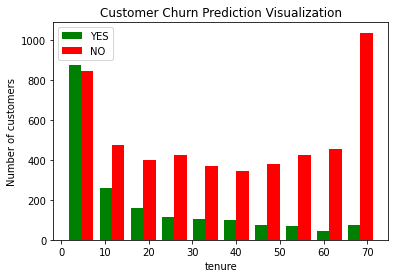

In [11]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.hist([tenure_churn_yes  , tenure_churn_no] , color = ['green' , 'red'] , label = ['YES' , 'NO'])

plt.xlabel('tenure')
plt.ylabel('Number of customers')
plt.title('Customer Churn Prediction Visualization')

plt.legend()

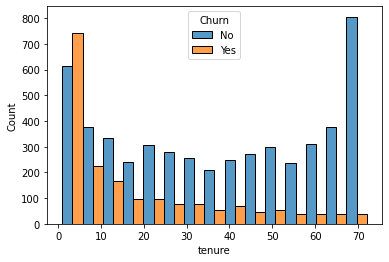

In [12]:
import seaborn as sns
sns.histplot(data = df1 , x = 'tenure', hue = 'Churn' ,  multiple="dodge")

It can be observed that customers who are with the company for long time have less chance of leaving i.e churn = No

##### Explore Monthly charges column with churn

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


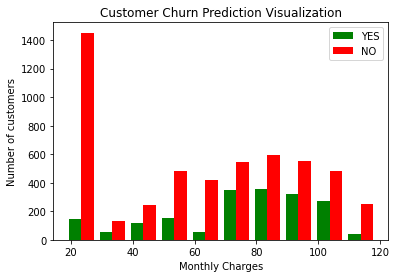

In [13]:
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.hist([mc_churn_yes  , mc_churn_no] , color = ['green' , 'red'] , label = ['YES' , 'NO'])

plt.xlabel('Monthly Charges')
plt.ylabel('Number of customers')
plt.title('Customer Churn Prediction Visualization')

plt.legend()

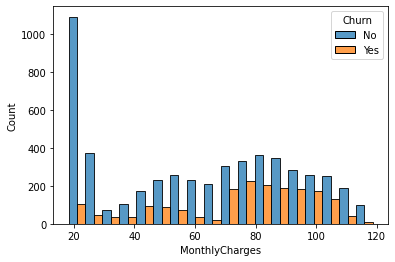

In [14]:
import seaborn as sns
sns.histplot(data = df1 , x = 'MonthlyCharges', hue = 'Churn' ,  multiple="dodge")

#### Label Encoding of categorical columns

##### Check unique values in columns which are of object type

In [15]:
def print_unique_col_values(df) :
  for column in df :
    if df[column].dtypes == 'object' : 
      print(f'{column} : {df[column].unique()}')

In [16]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


#### Values like No internet service / No phone service replace with No

In [17]:
df1 = df1.replace('No internet service' , 'No')
df1 = df1.replace('No phone service' , 'No')

print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


#### Replace Yes , No with 1 , 0 . Also replace Female , Male 1 , 0

In [18]:
yes_no_columns = ['Partner' , 'Dependents' , 'PhoneService' , 'MultipleLines' , 'OnlineSecurity' , 'OnlineBackup' , 'DeviceProtection' , 'TechSupport' , 'StreamingTV' , 'StreamingMovies' , 'PaperlessBilling' , 'Churn']

for col in yes_no_columns : 
  df1[col] = df1[col].replace({'Yes' : 1 , 'No' : 0})
  
df1['gender'] = df1['gender'].replace({'Female' : 1 , 'Male' : 0})

In [19]:
for column in df1 : 
  print(f'{column} : {df1[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


#### One hot encoding of categorical columns also drop first category to avoid dummy variable trap

In [20]:
df2 = pd.get_dummies(data = df1 , columns = ['InternetService' , 'Contract' , 'PaymentMethod'] , drop_first = True)

df2.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                uint8
InternetService_No                         uint8
Contract_One year                          uint8
Contract_Two year   

Now all columns are either integer or float, no more categorical columns

### Perform scaling of columns and try and make them in range 0 to 1 to improve model

In [21]:
cols_to_scale = ['tenure' , 'MonthlyCharges' , 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,0.115423,0.001275,0,0,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0.385075,0.215867,0,0,0,1,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,0.354229,0.010310,1,0,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,0.239303,0.210241,0,0,0,1,0,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0.521891,0.015330,1,1,0,0,0,0,1,0


### Split dependent and independent features and split the data into test and train

In [22]:
X = df2.drop('Churn' , axis = 1)
y = df2['Churn']

In [23]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 15)

In [24]:
X_train.shape

(5625, 23)

In [25]:
X_test.shape

(1407, 23)

### Creating ANN

In [26]:
pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from tensorflow_addons import losses

In [28]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [29]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim= X_train.shape[1], activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [30]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.5440 - accuracy: 0.7365
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4330 - accuracy: 0.7924
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4214 - accuracy: 0.8004
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4191 - accuracy: 0.8011
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4176 - accuracy: 0.8034
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4148 - accuracy: 0.8066
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4138 - accuracy: 0.8059
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4128 - accuracy: 0.8055
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4105 - accuracy: 0.8059
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4099 - accura

In [31]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

**Note that in the above cell that how imbalanced target variable is**

## Migitating Skewdness of Data

**Stratify is number of records in test and train of different classes will be in same ratio as they are in the dataset before splitting into test and train**

Reference : reference: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

### Method 1: Undersampling

This makes count of majority class equal to count of minority class by taking a random sample of rows equal to count of minority class

In [32]:
# Class count
count_class_0, count_class_1 = df2.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [33]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [34]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [35]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [36]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6180 - accuracy: 0.6709
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5037 - accuracy: 0.7555
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4828 - accuracy: 0.7659
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4770 - accuracy: 0.7722
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4739 - accuracy: 0.7732
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4707 - accuracy: 0.7709
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.7773
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4671 - accuracy: 0.7722
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4652 - accuracy: 0.7766
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4654 - accuracy: 0.7739
Epoch 11/

Check classification report above. f1-score for minority class improved. We have more generalized classifier which classifies both classes with similar prediction score

### Method 2: Oversampling

In [37]:
# Oversample 1-class and concat the DataFrames of both classes

# Duplicate records of minority class random rows to make it same number as majority class
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [38]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [39]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [40]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 3ms/step - loss: 0.5549 - accuracy: 0.7257
Epoch 2/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4897 - accuracy: 0.7598
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4805 - accuracy: 0.7633
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4760 - accuracy: 0.7685
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4733 - accuracy: 0.7697
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4704 - accuracy: 0.7688
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4675 - accuracy: 0.7722
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4659 - accuracy: 0.7738
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4653 - accuracy: 0.7742
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4606 - accura

Check classification report of imbalanced dataset. f1-score for minority class 1 improved . Score for class 0 reduced to 0.77 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

### Method 3: SMOTE

SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [41]:
pip install imbalanced-learn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [43]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [45]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [46]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 4ms/step - loss: 0.5444 - accuracy: 0.7222
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4665 - accuracy: 0.7818
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4583 - accuracy: 0.7878
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4531 - accuracy: 0.7903
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4490 - accuracy: 0.7935
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4443 - accuracy: 0.7919
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4413 - accuracy: 0.7964
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4384 - accuracy: 0.8004
Epoch 9/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4360 - accuracy: 0.7981
Epoch 10/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4334 - accura


SMOTE Oversampling increases f1 score of minority class.

### Method 4: Use of Ensemble with undersampling

model1 --> class1(1495) + class0(0, 1495)

model2 --> class1(1495) + class0(1496, 2990)

model3 --> class1(1495) + class0(2990, 4130)

In [47]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [48]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [50]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [51]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [52]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,0.525871,0.006035,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0.713930,0.174077,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0.061692,0.163034,0,1,1,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0.607960,0.661718,0,0,0,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0.298507,0.021169,0,0,0,0,0,0,1,0


In [53]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [54]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train  

In [55]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6281 - accuracy: 0.6759
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5248 - accuracy: 0.7445
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4972 - accuracy: 0.7609
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4902 - accuracy: 0.7712
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4841 - accuracy: 0.7689
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4813 - accuracy: 0.7722
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4791 - accuracy: 0.7669
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4756 - accuracy: 0.7699
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4740 - accuracy: 0.7746
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4726 - accuracy: 0.7756
Epoch 11/

In [56]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6164 - accuracy: 0.6609
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5109 - accuracy: 0.7478
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4944 - accuracy: 0.7552
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4874 - accuracy: 0.7609
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4846 - accuracy: 0.7642
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4816 - accuracy: 0.7682
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4791 - accuracy: 0.7672
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4773 - accuracy: 0.7746
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4756 - accuracy: 0.7729
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4739 - accuracy: 0.7729
Epoch 11/

In [57]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.5796 - accuracy: 0.7351
Epoch 2/100
83/83 [==============================] - 0s 3ms/step - loss: 0.5037 - accuracy: 0.7620
Epoch 3/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4890 - accuracy: 0.7708
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4796 - accuracy: 0.7806
Epoch 5/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4759 - accuracy: 0.7719
Epoch 6/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4728 - accuracy: 0.7780
Epoch 7/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4698 - accuracy: 0.7841
Epoch 8/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4664 - accuracy: 0.7875
Epoch 9/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4640 - accuracy: 0.7882
Epoch 10/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4632 - accuracy: 0.7863
Epoch 11/

In [58]:
len(y_pred1)

1407

In [59]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [60]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1033
           1       0.49      0.77      0.60       374

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.79      0.73      0.74      1407



Imbalanced Dataset

Classification Report: 

               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1040
           1       0.63      0.51      0.56       367

    accuracy                           0.79      1407
 
    macro avg       0.73      0.70      0.71      1407

    weighted avg       0.78      0.79      0.79      1407


UNDERSAMPLING

Classification Report: 

               precision    recall  f1-score   support

           0       0.73      0.72      0.73       374
           1       0.72      0.74      0.73       374

    accuracy                           0.73       748
 
    macro avg       0.73      0.73      0.73       748
    
    weighted avg       0.73      0.73      0.73       748


OVERSAMPLING

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.70      0.77      1033
           1       0.74      0.87      0.80      1033

    accuracy                           0.79      2066
    
    macro avg       0.80      0.79      0.78      2066

    weighted avg       0.80      0.79      0.78      2066

SMOTE Oversampling

Classification Report: 

               precision    recall  f1-score   support

           0       0.85      0.71      0.77      1033
           1       0.75      0.87      0.81      1033

    accuracy                           0.79      2066
 
    macro avg       0.80      0.79      0.79      2066
    
    weighted avg       0.80      0.79      0.79      2066

Ensemble with UnderSampling

Part 1

Classification Report: 

               precision    recall  f1-score   support

           0       0.89      0.69      0.78      1033
           1       0.47      0.76      0.58       374

    accuracy                           0.71      1407
 
    macro avg       0.68      0.73      0.68      1407
    
    weighted avg       0.78      0.71      0.73      1407

Part 2

Classification Report: 

               precision    recall  f1-score   support

           0       0.87      0.74      0.80      1033
           1       0.49      0.70      0.58       374

    accuracy                           0.73      1407

    macro avg       0.68      0.72      0.69      1407

    weighted avg       0.77      0.73      0.74      1407

Part 3

Classification Report: 

               precision    recall  f1-score   support

           0       0.90      0.66      0.76      1033
           1       0.46      0.80      0.58       374

    accuracy                           0.70      1407

    macro avg       0.68      0.73      0.67      1407

    weighted avg       0.78      0.70      0.71      1407

Overall

Classification Report: 

               precision    recall  f1-score   support

           0       0.90      0.71      0.79      1033
           1       0.49      0.77      0.60       374

    accuracy                           0.73      1407
 
    macro avg       0.69      0.74      0.70      1407
    
    weighted avg       0.79      0.73      0.74      1407